In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
from keras.models import Sequential
from keras.layers import Activation,Conv2D,GlobalAveragePooling2D,Dropout, Flatten, Dense , MaxPool2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn import metrics
from keras import regularizers

In [ ]:
tpu = 'grpc://' + os.environ['COLAB_TPU_ADDR']
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=tpu)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)

In [ ]:
train_data = ImageDataGenerator(rescale=1./255,)
test_data = ImageDataGenerator(rescale=1./255)

train_set = train_data.flow_from_directory('/content/drive/MyDrive/data/train/',
                                          class_mode = 'binary')
                                         
test_set = test_data.flow_from_directory('/content/drive/MyDrive/data/test/',
                                          class_mode = 'binary',
                                         shuffle=False)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'benign': 0, 'malignant': 1}

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
                                    Dropout(.50),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(Dropout(0.20))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.20))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.20))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.20))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.50))
model.add(keras.layers.Dense(1,activation='sigmoid'))

INPUT:224×224×3 
 
CONV3:3×3 size,32  filters, 1 stride 
 
ReLU: max (0, hθ(x)) 
 
POOL:2×2 size,1 stride 
 
CONV3: 3×3 size,32  filters,1  stride 
 
ReLU: max (0, hθ(x)) 
 
POOL:2×2 size,1 stride 
 
FC: 128 Hidden Neurons 
 
FC: 2 Output Classes (because this  is a Binary Classification). 

 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1),input_shape=(256,256,3) ,activation='relu'))
model.add(MaxPool2D((2,2), strides=(1,1)))
#model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), strides=(1,1),activation='relu'))
model.add(MaxPool2D((2,2), strides=(1,1)))
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(monitor='loss', patience=10)
epochs=20
history = model.fit_generator(train_set,validation_data=test_set, epochs=epochs,callbacks=[callback])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


83/83 [==============================] - 16s 186ms/step - loss: 1.9521 - accuracy: 0.6792 - val_loss: 0.4950 - val_accuracy: 0.7576
Epoch 2/20
83/83 [==============================] - 15s 183ms/step - loss: 0.5074 - accuracy: 0.7656 - val_loss: 0.4525 - val_accuracy: 0.7864
Epoch 3/20
83/83 [==============================] - 14s 166ms/step - loss: 0.4919 - accuracy: 0.7812 - val_loss: 0.4821 - val_accuracy: 0.7818
Epoch 4/20
83/83 [==============================] - 14s 167ms/step - loss: 0.4760 - accuracy: 0.7873 - val_loss: 0.4221 - val_accuracy: 0.8167
Epoch 5/20
83/83 [==============================] - 14s 164ms/step - loss: 0.4672 - accuracy: 0.7819 - val_loss: 0.4206 - val_accuracy: 0.8242
Epoch 6/20
83/83 [==============================] - 14s 171ms/step - loss: 0.4630 - accuracy: 0.7884 - val_loss: 0.4440 - val_accuracy: 0.7894
Epoch 7/20
83/83 [==============================] - 14s 163ms/step - loss: 0.4570 - accuracy: 0.7998 - val_loss: 0.4058 - val_accuracy: 0.8333
Epoch 8/20

In [ ]:
test_set.reset()
predictions = model.predict_generator(test_set)
predicted_classes = np.round(predictions)
true_classes = test_set.classes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


[Text(0, 0.5, 'benign'), Text(0, 1.5, 'malignant')]

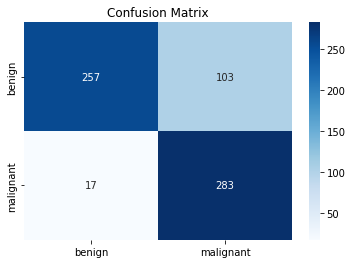

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(metrics.confusion_matrix(true_classes, predicted_classes), annot=True, cmap='Blues',  fmt="d")
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['benign', 'malignant'])
ax.yaxis.set_ticklabels(['benign','malignant'])

In [ ]:
model.evaluate(test_set)

21/21 [==============================] - 3s 118ms/step - loss: 0.4027 - accuracy: 0.8182


[0.40273043513298035, 0.8181818127632141]

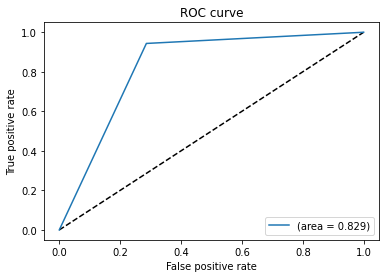

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
fpr_keras, tpr_keras, thresholds_keras = roc_curve(true_classes, predicted_classes)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='(area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
print('True negative rate: {}'.format(metrics.confusion_matrix(true_classes, predicted_classes)[0][0]))
print('True positive rate: {}'.format(metrics.confusion_matrix(true_classes, predicted_classes)[1][1]))
print('False negative rate: {}'.format(metrics.confusion_matrix(true_classes, predicted_classes)[1][0]))
print('False positive rate: {}'.format(metrics.confusion_matrix(true_classes, predicted_classes)[0][1]))

True negative rate: 273
True positive rate: 274
False negative rate: 26
False positive rate: 87
